In [29]:
# NLTK: NLP tools

import nltk

In [30]:
# Tokenization and POS tagging

sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)

tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[0:13]

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

Tree('S', [('At', 'IN'), ('eight', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Thursday', 'NNP'), ('morning', 'NN'), Tree('PERSON', [('Arthur', 'NNP')]), ('did', 'VBD'), ("n't", 'RB'), ('feel', 'VB'), ('very', 'RB'), ('good', 'JJ'), ('.', '.')])


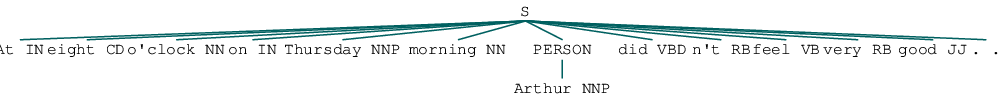

In [32]:
# Identify named entities:

entities = nltk.chunk.ne_chunk(tagged)
from pprint import pprint
pprint(entities)
entities

In [33]:
# Display a parse tree:

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

In [6]:
from __future__ import print_function
from nltk.stem import *

from nltk.stem.porter import *
# Create a new Porter stemmer.
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied', 'died', 'agreed', 'owned', 'humbled', 'sized', 'meeting', 'stating', 'siezing', 'itemization', 'sensational', 'traditional', 'reference', 'colonizer', 'plotted']
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))  # doctest: +NORMALIZE_WHITESPACE

caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


In [7]:
# Porter stemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('cars')

'car'

In [8]:
stemmer.stem("Porter's")

"porter'"

In [9]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer.stem("running")

'run'

In [10]:
# WordNet
import nltk
from nltk.corpus import wordnet as wn
wn.synsets('chihuahua')
wn.synsets('happy')

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [11]:
# WordNet
from pprint import pprint
from nltk.corpus import wordnet as wn
#panda = wn.synset('panda.n.01')
king = wn.synset('king.n.01')
hyper = lambda s: s.hypernyms()
hypo = lambda s: s.hyponyms()
list(king.closure(hyper))
list(king.closure(hypo))

#pprint(wn.synsets('king'))
#pprint(wn.synsets('panda'))
#pprint(wn.synsets('good'))

[Synset('king_of_england.n.01'),
 Synset('king_of_france.n.01'),
 Synset('king_of_the_germans.n.01')]

In [12]:
# WordNet
from pprint import pprint
from nltk.corpus import wordnet as wn
#panda = wn.synset('panda.n.01')
emperor = wn.synset('empress.n.01')
hyper = lambda s: s.hyponyms()
list(emperor.closure(hyper))

#pprint(wn.synsets('king'))
#pprint(wn.synsets('panda'))
#pprint(wn.synsets('good'))

[]

In [13]:
#pprint(wn.synsets('good')[0].name())
#pprint(wn.synsets('good')[0].lemmas()[0].name())
pprint(wn.synsets('chihuahua')[0].definition())
pprint(wn.synsets('good')[0].examples())

('a city in northern Mexico in the state of Chihuahua; commercial center of '
 'northern Mexico')
['for your own good', "what's the good of worrying?"]


In [14]:
# WordNet Lemmatizer

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))
print(lemmatizer.lemmatize('swam',pos="v"))

increase
swim


In [15]:
# Different between Lemmatization and Stemmatization

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print(stemmer.stem('stones'))
print(stemmer.stem('speaking'))
print(stemmer.stem('bedroom'))
print(stemmer.stem('jokes'))
print(stemmer.stem('lisa'))
print(stemmer.stem('purple'))
print('----------------------')

print(lemmatizer.lemmatize('stones'))
print(lemmatizer.lemmatize('speaking'))
print(lemmatizer.lemmatize('bedroom'))
print(lemmatizer.lemmatize('jokes'))
print(lemmatizer.lemmatize('lisa'))
print(lemmatizer.lemmatize('purple'))

stone
speak
bedroom
joke
lisa
purpl
----------------------
stone
speaking
bedroom
joke
lisa
purple


In [16]:
# Edit distance
nltk.edit_distance("aa bbbb cc", "aa b cc")
nltk.edit_distance("able", "belt")

3

In [17]:
# Extract NE from multiple sentences from a file
#geo = Geographical Entity
#org = Organization
#per = Person
#gpe = Geopolitical Entity
#tim = Time indicator
#art = Artifact
#eve = Event
#nat = Natural Phenomenon

import nltk
from nltk.chunk import conlltags2tree, tree2conlltags

with open('sample.txt', 'r') as f:
    sample = f.read()

In [18]:
sample

"I am a man. There are three Trump's and one Hillary. On the mount Fuji, we can see a panoramic view.\nHe lives in Paris for many years already. He also married with a Canadian.\n"

In [19]:
sentences = nltk.sent_tokenize(sample)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences)
#chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)

In [20]:
sentences

['I am a man.',
 "There are three Trump's and one Hillary.",
 'On the mount Fuji, we can see a panoramic view.',
 'He lives in Paris for many years already.',
 'He also married with a Canadian.']

In [21]:
tokenized_sentences

[['I', 'am', 'a', 'man', '.'],
 ['There', 'are', 'three', 'Trump', "'s", 'and', 'one', 'Hillary', '.'],
 ['On',
  'the',
  'mount',
  'Fuji',
  ',',
  'we',
  'can',
  'see',
  'a',
  'panoramic',
  'view',
  '.'],
 ['He', 'lives', 'in', 'Paris', 'for', 'many', 'years', 'already', '.'],
 ['He', 'also', 'married', 'with', 'a', 'Canadian', '.']]

In [22]:
tagged_sentences

[[('I', 'PRP'), ('am', 'VBP'), ('a', 'DT'), ('man', 'NN'), ('.', '.')],
 [('There', 'EX'),
  ('are', 'VBP'),
  ('three', 'CD'),
  ('Trump', 'NNP'),
  ("'s", 'POS'),
  ('and', 'CC'),
  ('one', 'CD'),
  ('Hillary', 'NNP'),
  ('.', '.')],
 [('On', 'IN'),
  ('the', 'DT'),
  ('mount', 'NN'),
  ('Fuji', 'NNP'),
  (',', ','),
  ('we', 'PRP'),
  ('can', 'MD'),
  ('see', 'VB'),
  ('a', 'DT'),
  ('panoramic', 'JJ'),
  ('view', 'NN'),
  ('.', '.')],
 [('He', 'PRP'),
  ('lives', 'VBZ'),
  ('in', 'IN'),
  ('Paris', 'NNP'),
  ('for', 'IN'),
  ('many', 'JJ'),
  ('years', 'NNS'),
  ('already', 'RB'),
  ('.', '.')],
 [('He', 'PRP'),
  ('also', 'RB'),
  ('married', 'VBD'),
  ('with', 'IN'),
  ('a', 'DT'),
  ('Canadian', 'NN'),
  ('.', '.')]]

In [23]:
iob_tagged = [tree2conlltags(chunked) for chunked in chunked_sentences]

In [24]:
iob_tagged

[[('I', 'PRP', 'O'),
  ('am', 'VBP', 'O'),
  ('a', 'DT', 'O'),
  ('man', 'NN', 'O'),
  ('.', '.', 'O')],
 [('There', 'EX', 'O'),
  ('are', 'VBP', 'O'),
  ('three', 'CD', 'O'),
  ('Trump', 'NNP', 'B-PERSON'),
  ("'s", 'POS', 'O'),
  ('and', 'CC', 'O'),
  ('one', 'CD', 'O'),
  ('Hillary', 'NNP', 'O'),
  ('.', '.', 'O')],
 [('On', 'IN', 'O'),
  ('the', 'DT', 'O'),
  ('mount', 'NN', 'O'),
  ('Fuji', 'NNP', 'B-PERSON'),
  (',', ',', 'O'),
  ('we', 'PRP', 'O'),
  ('can', 'MD', 'O'),
  ('see', 'VB', 'O'),
  ('a', 'DT', 'O'),
  ('panoramic', 'JJ', 'O'),
  ('view', 'NN', 'O'),
  ('.', '.', 'O')],
 [('He', 'PRP', 'O'),
  ('lives', 'VBZ', 'O'),
  ('in', 'IN', 'O'),
  ('Paris', 'NNP', 'B-GPE'),
  ('for', 'IN', 'O'),
  ('many', 'JJ', 'O'),
  ('years', 'NNS', 'O'),
  ('already', 'RB', 'O'),
  ('.', '.', 'O')],
 [('He', 'PRP', 'O'),
  ('also', 'RB', 'O'),
  ('married', 'VBD', 'O'),
  ('with', 'IN', 'O'),
  ('a', 'DT', 'O'),
  ('Canadian', 'NN', 'B-GPE'),
  ('.', '.', 'O')]]

In [25]:
# Extract NE from a sentence

from nltk.chunk import conlltags2tree, tree2conlltags

sentence = "Mark and John are working at Google."
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

#chunked = nltk.chunk.ne_chunk(tagged, binary=True)
chunked = nltk.chunk.ne_chunk(tagged)

#sentences = nltk.sent_tokenize(sample)
#tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
#tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
#chunked_sentences = nltk.chunk.ne_chunk(tagged_sentences, binary=True)

iob_tagged = tree2conlltags(chunked)
#print (iob_tagged)

In [26]:
tagged

[('Mark', 'NNP'),
 ('and', 'CC'),
 ('John', 'NNP'),
 ('are', 'VBP'),
 ('working', 'VBG'),
 ('at', 'IN'),
 ('Google', 'NNP'),
 ('.', '.')]

In [27]:
iob_tagged

[('Mark', 'NNP', 'B-PERSON'),
 ('and', 'CC', 'O'),
 ('John', 'NNP', 'B-PERSON'),
 ('are', 'VBP', 'O'),
 ('working', 'VBG', 'O'),
 ('at', 'IN', 'O'),
 ('Google', 'NNP', 'B-ORGANIZATION'),
 ('.', '.', 'O')]

In [28]:
ne_tree = conlltags2tree(iob_tagged)
print (ne_tree)

(S
  (PERSON Mark/NNP)
  and/CC
  (PERSON John/NNP)
  are/VBP
  working/VBG
  at/IN
  (ORGANIZATION Google/NNP)
  ./.)
